# Install dan Download Category Encoder


In [1]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.7MB/s 


# Import Libraries

Mengimport library yang dibutuhkan untuk analisis data.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import plot_tree
from matplotlib import style
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from category_encoders.target_encoder import TargetEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
style.use("classic")
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

**Import Dataset** 

Mengimport dataset yang akan digunakan untuk analisis data.

In [3]:
df = pd.read_csv('winemag-data_first150k.csv')

# EDA

**Identification of data types**

Mengidentifikasi tipe data dari setiap variabel dalam dataset.

In [ ]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

**Size of he dataset**

Mendapatkan ukuran dari data set.

In [ ]:
df.shape

(150930, 11)

**Statistical summary of numeric variables**

Karena pandas descrive() akan menunjukkan banyaknya data dari setiap variabel, kita bisa mengidentifikasi keberadaan missing value.

In [ ]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


**Get the count of unique values**

value_counts() akan menunjukkan jumlah data dari setiap value dalam sabuah kolom. Dari sini akan dapat dilihat kolom mana yang memiliki banyak data yang unik.

In [ ]:
df['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [ ]:
df['description'].value_counts() 

Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins. Shows real class and character.                                                                                                                                                                                                                   6
86-88 This could work as a rich wine, because there is good structure and piles of botrytis. It could be delicious, with its lovely dry finish, but that's for the future.                                                                                                                                                                                                                                                                           6
92-94 Barrel sample. A rounded wine, its tannins submerged into the ripe fruits. It feels soft, and there is just a bite o

In [ ]:
df['designation'].value_counts()

Reserve                                       2752
Reserva                                       1810
Estate                                        1571
Barrel sample                                 1326
Riserva                                        754
                                              ... 
Zwickl                                           1
Équinoxe                                         1
Baglio Badami Vioca                              1
Domaine de la Ferté Premier Cru Servoisine       1
Stoney Vine Vineyard                             1
Name: designation, Length: 30621, dtype: int64

In [ ]:
df['points'].value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

In [ ]:
df['price'].value_counts()

20.0     7860
15.0     7056
18.0     5988
25.0     5955
30.0     5449
         ... 
740.0       1
545.0       1
351.0       1
698.0       1
588.0       1
Name: price, Length: 357, dtype: int64

In [ ]:
df['province'].value_counts()

California         44508
Washington          9750
Tuscany             7281
Bordeaux            6111
Northern Spain      4892
                   ...  
Neuchâtel              1
Rose Valley            1
Pafos                  1
Colchagua Costa        1
Ilia                   1
Name: province, Length: 455, dtype: int64

In [ ]:
df['region_1'].value_counts()

Napa Valley                 6209
Columbia Valley (WA)        4975
Mendoza                     3586
Russian River Valley        3571
California                  3462
                            ... 
Musigny                        1
Rosso di Cerignola             1
Corton Perrières               1
Geelong                        1
South Australia-Victoria       1
Name: region_1, Length: 1236, dtype: int64

In [ ]:
df['region_2'].value_counts()

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [ ]:
df['variety'].value_counts()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Sauvignon Musqué                1
Albarossa                       1
Rebula                          1
Huxelrebe                       1
Morava                          1
Name: variety, Length: 632, dtype: int64

In [ ]:
df['winery'].value_counts()

Williams Selyem                  374
Testarossa                       274
DFJ Vinhos                       258
Chateau Ste. Michelle            225
Columbia Crest                   217
                                ... 
Lil Rippa                          1
Helmut Hexamer                     1
Trou de Bonde                      1
Fattoria Casetto dei Mandorli      1
Handpicked                         1
Name: winery, Length: 14810, dtype: int64

**Get the list & number of unique value**

nunique() mereturn jumlah nilai yang unik dari setiap kolom.

unique() mereturn daftar dari nilai yang unik dari setiap kolom.

In [ ]:
df['country'].nunique()

48

In [ ]:
df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [ ]:
df['description'].nunique()

97821

In [ ]:
df['description'].unique()

array(['This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.',
       'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.',
       'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.',
       ...,
  

In [ ]:
df['designation'].nunique()

30621

In [ ]:
df['designation'].unique()

array(["Martha's Vineyard", 'Carodorum Selección Especial Reserva',
       'Special Selected Late Harvest', ..., 'Delaware Dolce',
       'Presidential 20-year old tawny', 'Bungalow Red'], dtype=object)

In [ ]:
df['points'].nunique()

21

In [ ]:
df['points'].unique()

array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80])

In [ ]:
df['price'].nunique()

357

In [ ]:
df['price'].unique()

array([ 235.,  110.,   90.,   65.,   66.,   73.,   60.,   80.,   48.,
        185.,  325.,  290.,   75.,   24.,   79.,  220.,   45.,   57.,
         62.,  105.,   15.,   37.,   nan,   22.,   42.,  135.,   29.,
         23.,   17.,   26.,   55.,   39.,   69.,   30.,   50.,   40.,
        100.,   68.,   28.,   18.,   25.,   36.,   38.,   85.,   19.,
         54.,   59.,   10.,   12.,   13.,   14.,   20.,  125.,    7.,
         49.,   93.,   32.,   16.,   21.,   44.,   35.,   61.,   34.,
         11.,   58.,  120.,   41.,  200.,   43.,    9.,   56.,   46.,
         92.,   94.,   27.,   95.,   33.,   70.,  155.,   63.,  130.,
        115.,   31.,   98.,   52.,   64.,   91.,  111.,   88.,   74.,
         77.,   87.,  113.,  140.,  500.,   51.,  150.,  240.,   72.,
        103.,    8.,  136.,  141.,  102.,   47.,   53.,   96.,   78.,
        149.,  138.,  117.,    4.,   99.,  848.,  450.,  330.,  175.,
         89.,   82.,   71.,  137.,  145.,  698.,  160.,  770.,  118.,
        238.,  202.,

In [ ]:
df['province'].nunique()

455

In [ ]:
df['province'].unique()

array(['California', 'Northern Spain', 'Oregon', 'Provence',
       'Northeastern Italy', 'Southwest France', 'Kumeu', 'Washington',
       'Bulgaria', 'Tuscany', 'France Other', 'Rhône Valley', 'Galicia',
       'Andalucia', 'Idaho', 'Burgundy', 'Loire Valley', 'New York',
       'Mendoza Province', 'Victoria', 'Alentejano', 'Piedmont',
       'Alentejo', 'Champagne', 'Upper Galilee', 'Beira Atlantico',
       'Veneto', 'Douro', 'Tejo', 'Stellenbosch', 'Levante',
       'Sicily & Sardinia', 'Southern Italy', 'Languedoc-Roussillon',
       'Bordeaux', 'Atalanti Valley', 'Catalonia', 'Santorini', 'Florina',
       'Marchigue', 'Colchagua Valley', 'Curicó Valley', 'Nemea',
       'Maule Valley', 'Alsace', 'Guerrouane', 'Colinele Dobrogei',
       'Central Spain', 'Vinho Verde', 'Mosel', 'Rheinhessen',
       'Golan Heights', 'Württemberg', 'Ahr', 'British Columbia',
       'Moldova', 'Spain Other', 'Sopron', 'Other', 'Walker Bay', 'Dão',
       'Italy Other', 'Duriense', 'Ontario', 'Beir

In [ ]:
df['region_1'].nunique()

1236

In [ ]:
df['region_1'].unique()

array(['Napa Valley', 'Toro', 'Knights Valley', ..., 'Listrac',
       'St.-Amour', 'Coteaux du Tricastin'], dtype=object)

In [ ]:
df['region_2'].nunique()

18

In [ ]:
df['region_2'].unique()

array(['Napa', nan, 'Sonoma', 'Willamette Valley', 'Central Coast',
       'Columbia Valley', 'Finger Lakes', 'California Other',
       'Mendocino/Lake Counties', 'South Coast', 'Central Valley',
       'New York Other', 'Sierra Foothills', 'Southern Oregon',
       'Oregon Other', 'Napa-Sonoma', 'North Coast', 'Washington Other',
       'Long Island'], dtype=object)

In [ ]:
df['variety'].nunique()

632

In [ ]:
df['variety'].unique()

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sangiovese', 'Sparkling Blend',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino',
       'Petite Sirah', 'Riesling', 'Cabernet Sauvignon-Syrah',
       'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Meritage', 'Baga',
       'Glera', 'Malbec-Merlot', 'Merlot-Malbec', 'Ugni Blanc-Colombard',
       'Viognier', 'Cabernet Sauvignon-Cabernet Franc', 'Moscato',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Monastrell',
       'Gamay', 'Zinfandel', 'Greco', 'Barbera', 'Grenache',
       'Rhône-style Red Blend', 'Albariño', 'Malvasia Bianca',
       'Assyrtiko', 'Malagouzia', 'Carmenère', 'Bordeaux-style Red Blend',
       'Touriga Nacional', 'Agiorgitiko', 'Picpoul', 'Godello',
       'Gewürztraminer', 'Merlot', 'Syrah-Grenache', 'G-S-M

In [ ]:
df['winery'].nunique()

14810

In [ ]:
df['winery'].unique()

array(['Heitz', 'Bodega Carmen Rodríguez', 'Macauley', ..., 'Screwed',
       'Red Bucket', 'White Knot'], dtype=object)

**Finding null values**

Menghitung jumlah data yang nilainya null pada setiap kolom.

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

**Histogram**

Histogram digunakan untuk melihat distribusi data dan mengidentifikasi outliers. 

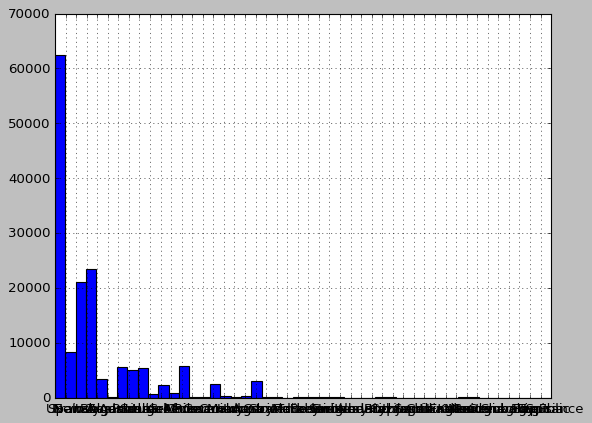

In [ ]:
df['country'].hist(bins=48)

In [ ]:
# df['description'].hist(bins=97821) histogram tidak ditunjukkan karena jumlah data unik terlalu banyak, yang mengakibatkan waktu yang dibutuhkan terlalu lama dan jika hanya menggunakan jumlah bins yang sedikit maka hasilnya akan tidak sesuai.

In [ ]:
# df['designation'].hist(bins=30621) histogram tidak ditunjukkan karena jumlah data unik terlalu banyak, yang mengakibatkan waktu yang dibutuhkan terlalu lama dan jika hanya menggunakan jumlah bins yang sedikit maka hasilnya akan tidak sesuai.

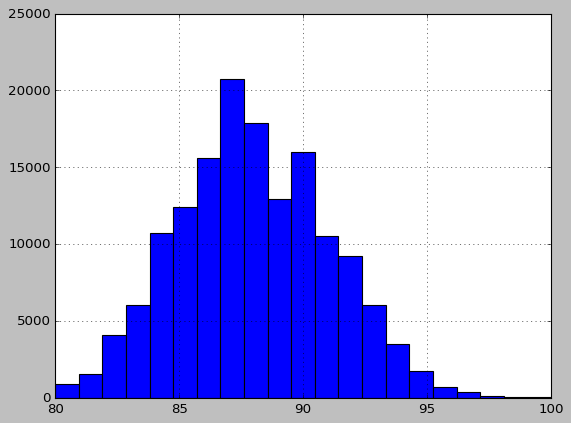

In [ ]:
df['points'].hist(bins=21)

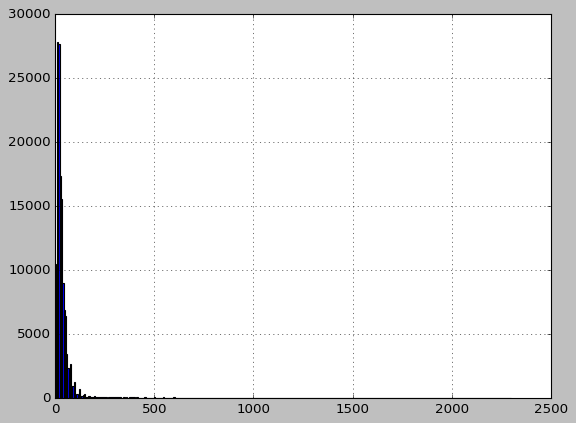

In [ ]:
df['price'].hist(bins=357)

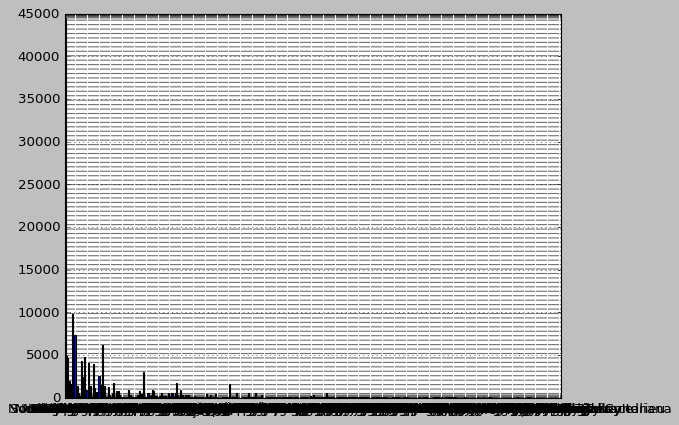

In [ ]:
df['province'].hist(bins=455)

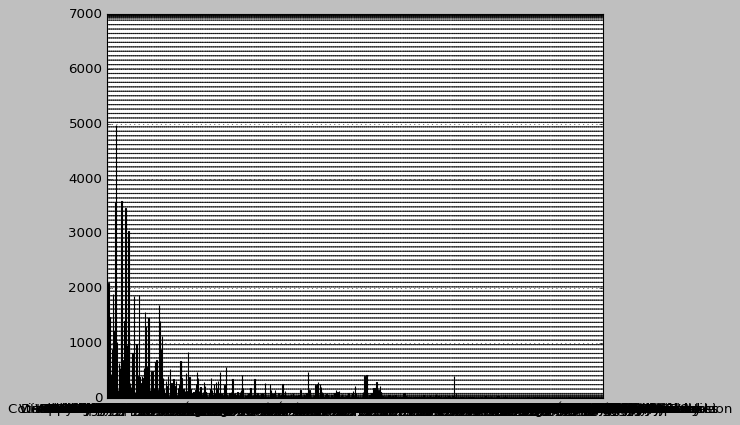

In [ ]:
df['region_1'].hist(bins=1236)

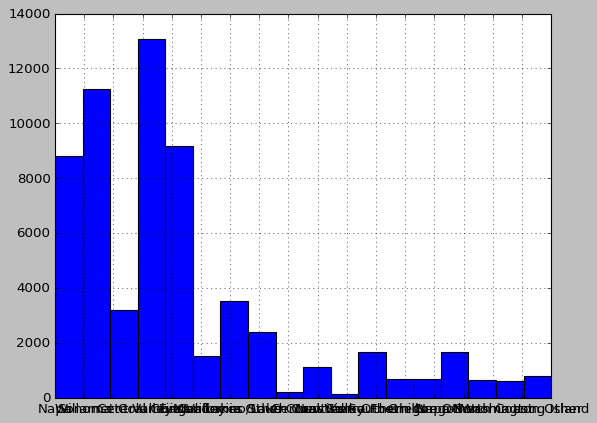

In [ ]:
df['region_2'].hist(bins=18)

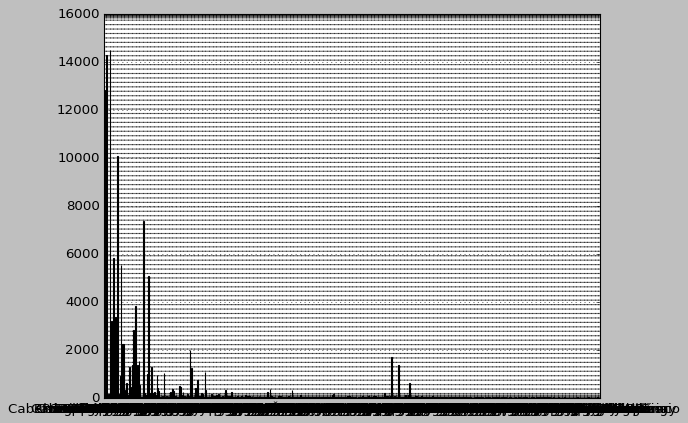

In [ ]:
df['variety'].hist(bins=632)

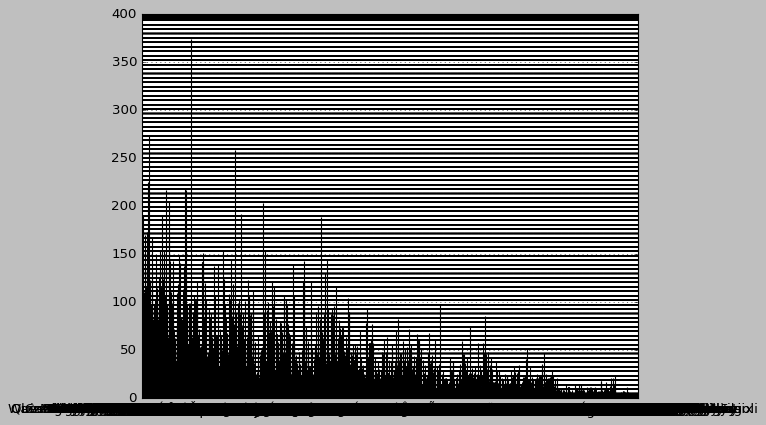

In [ ]:
df['winery'].hist(bins=14810) 

# Deklarasi Fungsi Entropy dan Information Gain

**Menghitung Entropy**

In [ ]:
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

**Menghitung Information Gain Tiap Kolom**

In [ ]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

**Me-return hasil dari information gain semua kolom**

In [ ]:
columns = ['country', 'designation', 'price', 'province', 'region_1', 'variety', 'winery']

def print_info_gain(columns):
  #Intialize an empty dictionary for information gains
  information_gains = {}
  
  #Iterate through each column name in our list
  for col in columns:
    #Find the information gain for the column
    information_gain = calc_information_gain(df_c, col, 'points')
    #Add the information gain to our dictionary using the column name as the ekey                                         
    information_gains[col] = information_gain
  key=information_gains.get
  #Return the key with the highest value                                          
  return (information_gains, key)

**Me-return Kolom dengan Information Gain Tertinggi**

In [ ]:
def highest_info_gain(columns):
  #Intialize an empty dictionary for information gains
  information_gains = {}
  
  #Iterate through each column name in our list
  for col in columns:
    #Find the information gain for the column
    information_gain = calc_information_gain(df_c, col, 'points')
    #Add the information gain to our dictionary using the column name as the ekey                                         
    information_gains[col] = information_gain
  #Return the key with the highest value                                          
  return max(information_gains, key=information_gains.get)
           

**Me-return Kolom dengan Information Gain Terendah**

In [ ]:
def lowest_info_gain(columns):
  #Intialize an empty dictionary for information gains
  information_gains = {}
  
  #Iterate through each column name in our list
  for col in columns:
    #Find the information gain for the column
    information_gain = calc_information_gain(df_c, col, 'points')
    #Add the information gain to our dictionary using the column name as the ekey                                         
    information_gains[col] = information_gain
  
  #Return the key with the highest value                                          
  return min(information_gains, key=information_gains.get)

# Membersihkan Data

**Drop Column**

Kolom description di-drop karena terlalu banyak unique value yang membuat deskripsi tidak terlalu berpengaruh terhadap penilaian.

Kolom region_2 di-drop karena terlalu banyak NULL value. 

In [4]:
df.drop(columns=['description', 'Unnamed: 0', 'region_2'], inplace=True)
df

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
150925,Italy,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


**Remove NULL Value**

Instances/row yang memiliki null value di salah satu kolomnya dibuang.

In [5]:
for col in df.columns:
    df = df[df[col].notnull()]
df

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
150923,France,Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


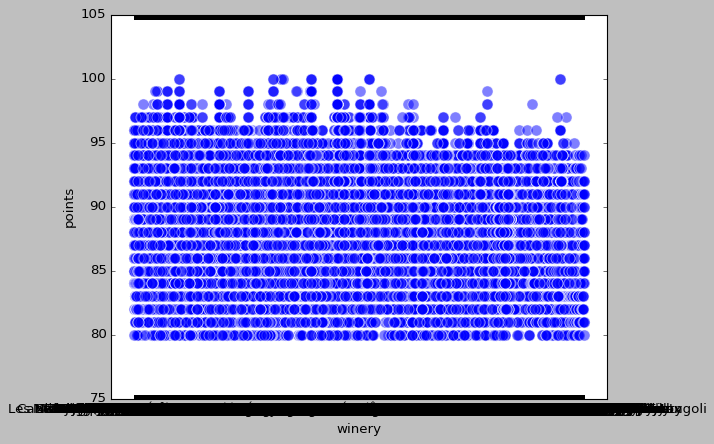

In [6]:
sns.scatterplot(x="winery", y="points", data=df, s=100, color="blue", alpha = 0.5)

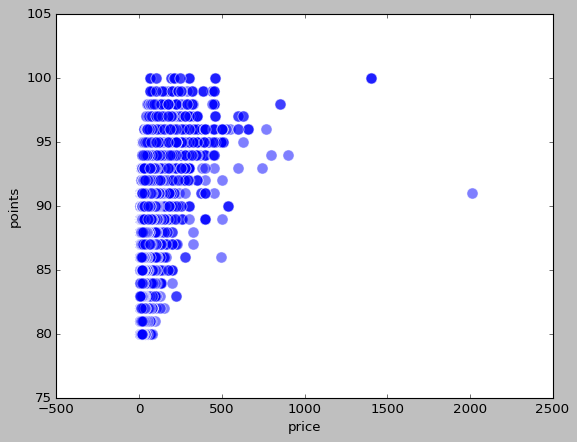

In [7]:
sns.scatterplot(x="price", y="points", data=df, s=100, color="blue", alpha = 0.5)

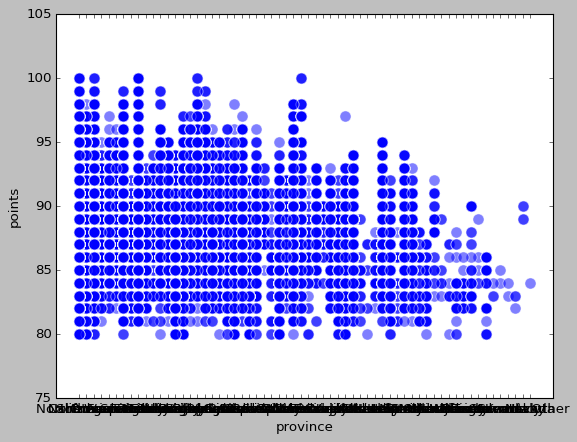

In [8]:
sns.scatterplot(x="province", y="points", data=df, s=100, color="blue", alpha = 0.5)

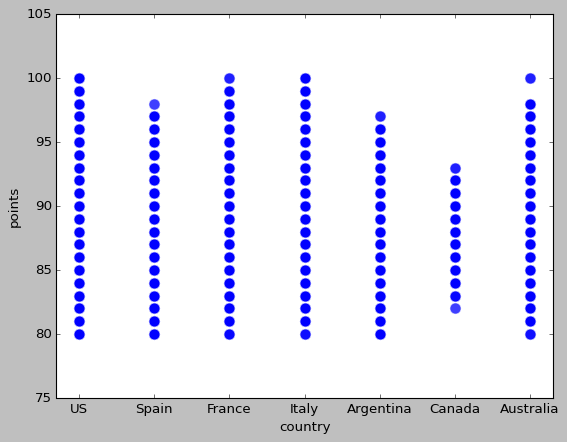

In [9]:
sns.scatterplot(x="country", y="points", data=df, s=100, color="blue", alpha = 0.5)

Mengambil data yang pricenya di bawah 1000, dikarenakan data yang di atas 1000 hanya ada 4 data dan menjadi outlier

In [10]:
harga_kurang_1000 = df.price < 1000
df = df[harga_kurang_1000]
df

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
150923,France,Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


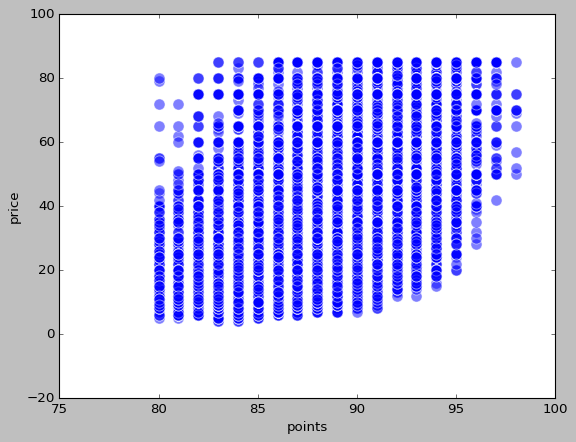

In [70]:
sns.scatterplot(x="points", y="price", data=df, s=100, color="blue", alpha = 0.5)

Mendiskritkan target menjadi kontinu menggunakan qcut dari pandas dengan parameter pd.qcut(kolom, jumlah_kelas, label) dan replace kolom target (price) dengan angka.

In [ ]:
df_c = df.copy()
df_c['points'] = pd.qcut(df_c['points'], 2, labels=['low', 'high'])
df_c['points'].replace({'low': 0, 'high': 1}, inplace=True)
df_c

# Menentukan Fitur Paling Berpengaruh dan Paling Tidak Berpengaruh

Menggunakan **Target Encoder** yang meng-encode berdasarkan target. Value yang diberikan antara 0 sampai 1

In [ ]:
te = TargetEncoder()

In [ ]:
y = df_c['points'].values
X = df_c.drop(columns=['points']).values
# X = df_disc[['Make', 'Engine HP', 'Engine Cylinders', 'Year', 'highway MPG', 'city mpg', 'Engine Fuel Type']].values
te.fit(X, df_c['points'].values)
X = te.transform(X)

X.columns = ['country', 'designation', 'price', 'province', 'region_1', 'variety', 'winery']

X

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,country,designation,price,province,region_1,variety,winery
0,0.464678,0.851988,0.999815,0.454885,0.554859,0.536321,0.934397
1,0.279232,0.449651,0.902703,0.300078,0.467213,0.548718,0.499663
2,0.464678,0.449651,0.909266,0.454885,0.512605,0.319409,0.934397
3,0.464678,0.373659,0.791103,0.567437,0.522215,0.604335,0.807692
4,0.534928,0.449651,0.917808,0.500000,0.766667,0.999991,0.934397
...,...,...,...,...,...,...,...
77275,0.534928,0.166667,0.463044,0.720480,0.721145,0.651813,0.625000
77276,0.534928,0.735756,0.855820,0.720480,0.721145,0.651813,0.571428
77277,0.534928,0.461538,0.429257,0.720480,0.721145,0.651813,0.973899
77278,0.467069,0.497612,0.298552,0.352941,0.638298,0.276988,0.500000


Mencetak information gain dari setiap kolom.

In [ ]:
info_gain = print_info_gain(columns)
for i in info_gain[0]:
  print(i ,":",info_gain[0][i])

country : 0.40477776410642663
designation : 0.992672950708268
price : 0.9915708763898623
province : 0.5795854162580041
region_1 : 0.9445141711006091
variety : 0.910489797510167
winery : 0.9925953109567152


Mencetak information gain tertinggi

In [ ]:
print(highest_info_gain(columns))

designation


Mencetak information gain tertinggi

In [ ]:
print(lowest_info_gain(columns))

country
